In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
XG Boost Model predicts weekly sale with 99 % percent accuracy i used 2 years Data for training with weekly data for each month of a year of 45 stores  with 6500 rows and 18 coloumns and used 1 year data for testing and the model is found to perform quite accurately

In [5]:
df=pd.read_csv("Data\\base_data.csv")

In [ ]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [7]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

In [8]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,4


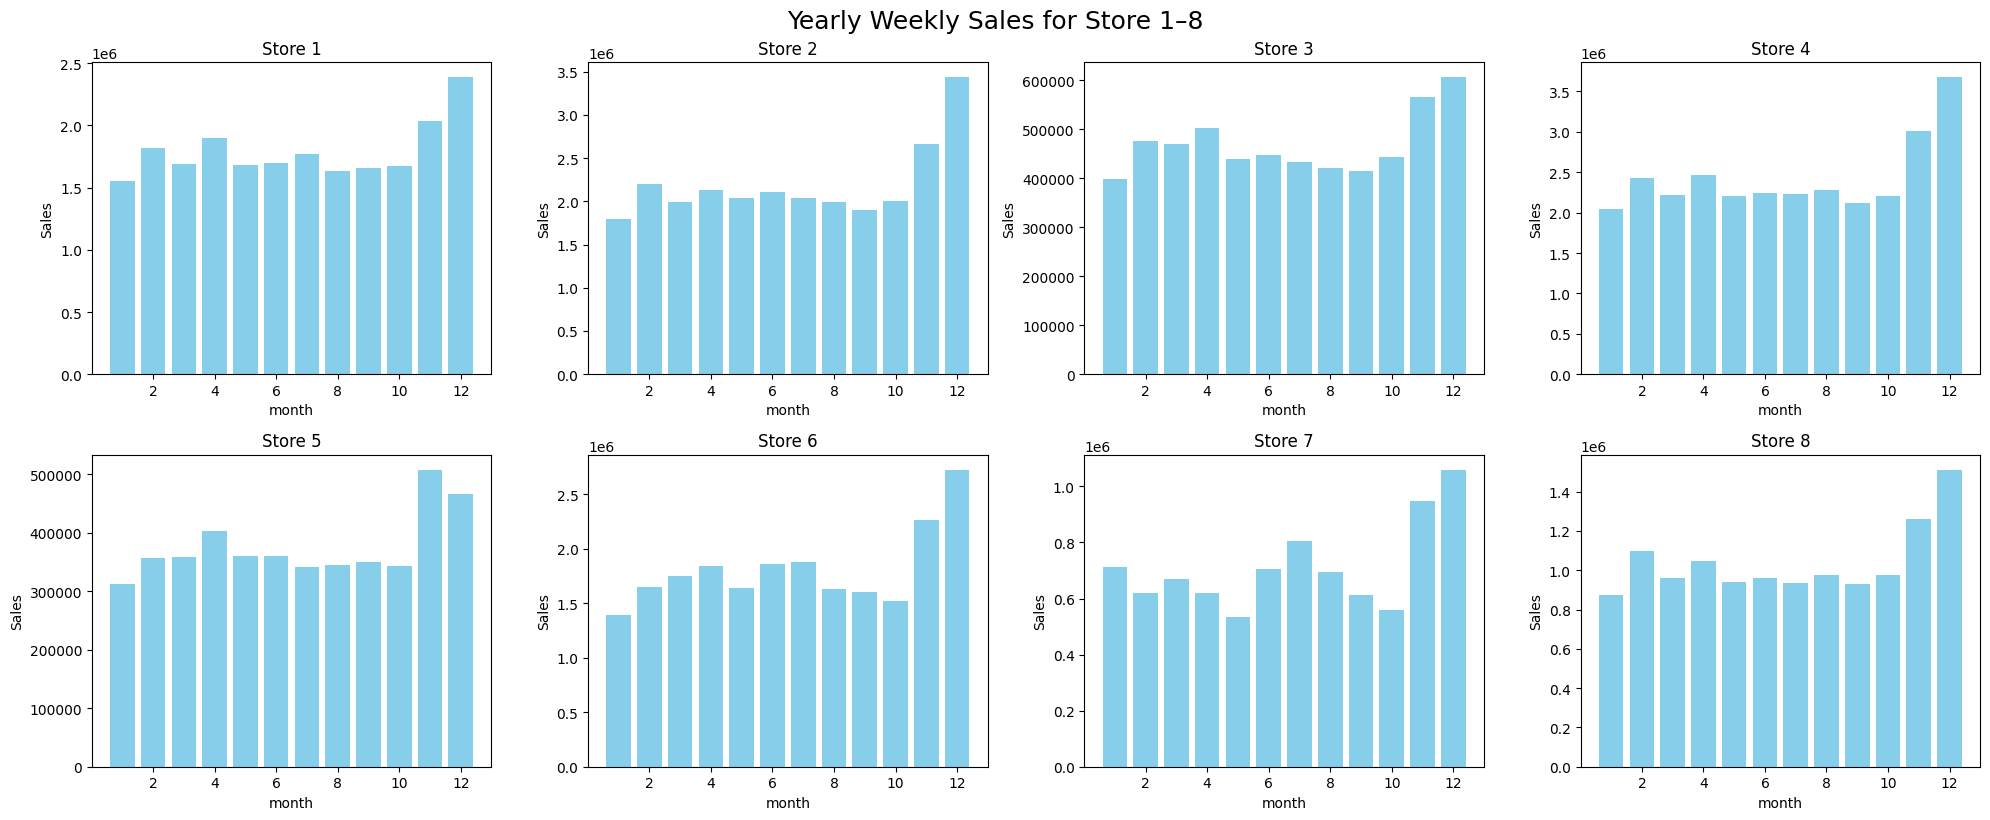

In [9]:

fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.flatten()

# Plot for stores 1 to 8
for i in range(8):
    store_num = i + 1
    store_data = df[df['Store'] == store_num]
    axs[i].bar(store_data['Month'], store_data['Weekly_Sales'], color='skyblue')
    axs[i].set_title(f"Store {store_num}")
    axs[i].set_xlabel("month")
    axs[i].set_ylabel("Sales")

plt.tight_layout()
plt.suptitle("Yearly Weekly Sales for Store 1–8", fontsize=18, y=1.02)
plt.show()

In [10]:
features = [
    'Store', 'Month', 'Year','Week','Quarter',
    'CPI', 'Temperature', 'Unemployment',
    'Fuel_Price','Holiday_Flag'
]
import seaborn as sns
import math

# Get number of unique values for each feature
nu = df[features].nunique().sort_values()

nf = []
cf = []

threshold = 45         #no. of stores

for col in nu.index:
    if nu[col] <= threshold:
        cf.append(col)
    else:
        nf.append(col)

print('\n\033[1mInference:\033[0m The dataset has \033[94m{} numerical\033[0m & \033[92m{} categorical\033[0m features.'.format(
    len(nf), len(cf)
))


Inference: The dataset has 5 numerical & 5 categorical features.


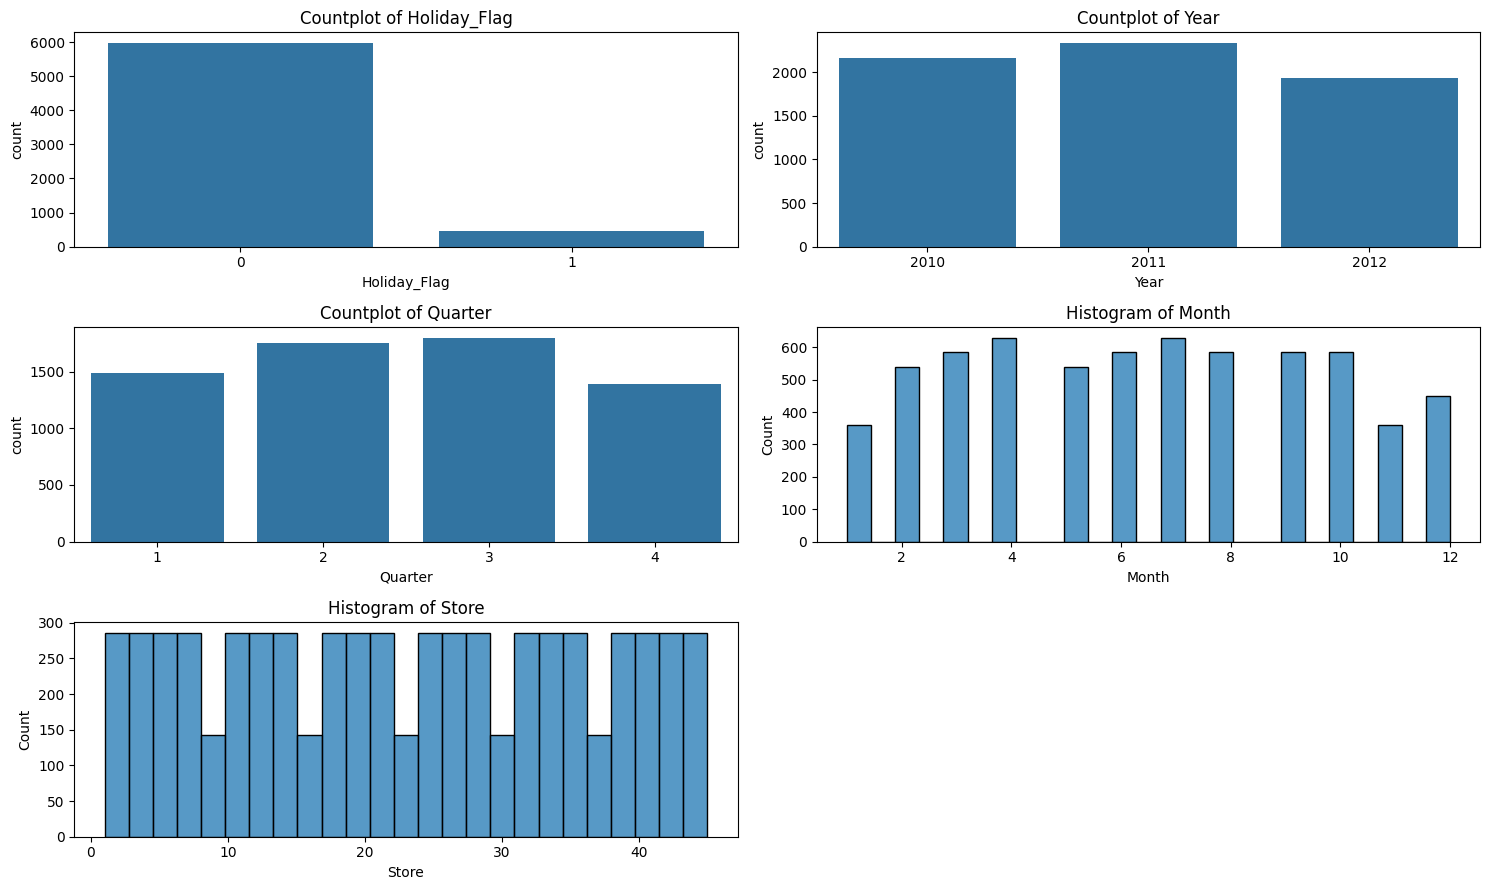

In [11]:
n = 2  # Plotting categorical features for EDA
num_plots = len(cf)
rows = math.ceil(num_plots / n)

plt.figure(figsize=[15, 3 * rows])

for i, col in enumerate(cf):
    plt.subplot(rows, n, i + 1)
    if df[col].nunique() <= 8:
        sns.countplot(x=df[col])
        plt.title(f'Countplot of {col}')
    else:
        sns.histplot(df[col], bins=25, kde=False)
        plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


In [12]:

# string to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort the DataFrame by date
df = df.sort_values(by='Date').reset_index(drop=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1
1,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,2010,2,5,1
2,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,2010,2,5,1
3,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,2010,2,5,1
4,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,2010,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,25,2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293,2012,10,43,4
6431,5,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422,2012,10,43,4
6432,40,2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145,2012,10,43,4
6433,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243,2012,10,43,4


In [13]:
train_df = df[(df['Year'] < 2012)]
test_df = df[(df['Year'] == 2012)]

In [19]:
# Prepare train_df with lag and rolling features

train_df = df[df['Year'] < 2012].copy()
train_df = train_df.sort_values(['Store', 'Date']).reset_index(drop=True)

# Lag and rolling parameters
lags = [1, 2, 3]
windows = [2, 3]

# Lag features
for lag in lags:
    train_df[f'Sales_lag_{lag}'] = train_df.groupby('Store')['Weekly_Sales'].shift(lag)

# Rolling mean and std
for window in windows:
    train_df[f'Sales_roll_{window}_mean'] = (
        train_df.groupby('Store')['Weekly_Sales']
        .shift(1).rolling(window).mean().reset_index(level=0, drop=True)
    )
    train_df[f'Sales_roll_{window}_std'] = (
        train_df.groupby('Store')['Weekly_Sales']
        .shift(1).rolling(window).std().reset_index(level=0, drop=True)
    )

# Percentage change
train_df['Sales_pct_change_1'] = train_df.groupby('Store')['Weekly_Sales'].pct_change(periods=1)

# Drop rows with NaNs introduced by shifting/rolling
train_df = train_df.dropna().reset_index(drop=True)


In [20]:
train_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_roll_2_mean,Sales_roll_2_std,Sales_roll_3_mean,Sales_roll_3_std,Sales_pct_change_1
0,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1,1611968.17,1641957.44,1643690.90,1626962.805,21205.616180,1.632539e+06,17835.791719,-0.125462
1,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1,1409727.59,1611968.17,1641957.44,1510847.880,143005.685549,1.554551e+06,126313.968444,0.102913
2,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,1,1554806.68,1409727.59,1611968.17,1482267.135,102586.408347,1.525501e+06,104256.598906,-0.074135
3,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,1,1439541.59,1554806.68,1409727.59,1497174.135,81504.726773,1.468025e+06,76619.033671,0.022906
4,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,1,1472515.79,1439541.59,1554806.68,1456028.690,23316.280424,1.488955e+06,59364.873755,-0.046238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,45,2011-12-02,875699.81,0,50.19,3.452,188.502435,8.523,2011,12,48,4,1170672.94,773603.77,808624.82,972138.355,280770.302707,9.176338e+05,219836.773123,-0.251969
4361,45,2011-12-09,957155.31,0,46.57,3.415,188.654469,8.523,2011,12,49,4,875699.81,1170672.94,773603.77,1023186.375,208577.500491,9.399922e+05,206194.355957,0.093018
4362,45,2011-12-16,1078905.68,0,39.93,3.413,188.797935,8.523,2011,12,50,4,957155.31,875699.81,1170672.94,916427.560,57597.736415,1.001176e+06,152334.021273,0.127200
4363,45,2011-12-23,1521957.99,0,42.27,3.389,188.929975,8.523,2011,12,51,4,1078905.68,957155.31,875699.81,1018030.495,86090.512239,9.705869e+05,102266.625933,0.410650


In [21]:
# Prepare test_df (2012) with safe lag and rolling features

# Get 2012 data
test_df = df[df['Year'] == 2012].copy()

# Get last 3 weeks of 2011 per store (buffer for lags)
buffer_df = (
    df[df['Year'] == 2011]
    .sort_values(['Store', 'Date'])
    .groupby('Store')
    .tail(3)
)

# Combine buffer + test
test_with_buffer = pd.concat([buffer_df, test_df], ignore_index=True)
test_with_buffer = test_with_buffer.sort_values(['Store', 'Date']).reset_index(drop=True)

# Lag features
for lag in lags:
    test_with_buffer[f'Sales_lag_{lag}'] = test_with_buffer.groupby('Store')['Weekly_Sales'].shift(lag)

# Rolling features
for window in windows:
    test_with_buffer[f'Sales_roll_{window}_mean'] = (
        test_with_buffer.groupby('Store')['Weekly_Sales']
        .shift(1).rolling(window).mean().reset_index(level=0, drop=True)
    )
    test_with_buffer[f'Sales_roll_{window}_std'] = (
        test_with_buffer.groupby('Store')['Weekly_Sales']
        .shift(1).rolling(window).std().reset_index(level=0, drop=True)
    )

# Percentage change
test_with_buffer['Sales_pct_change_1'] = test_with_buffer.groupby('Store')['Weekly_Sales'].pct_change(periods=1)

# Keep only 2012 rows
test_df = test_with_buffer[test_with_buffer['Year'] == 2012].dropna().reset_index(drop=True)


In [22]:
test_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_roll_2_mean,Sales_roll_2_std,Sales_roll_3_mean,Sales_roll_3_std,Sales_pct_change_1
0,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,1,1,1,1497462.72,2270188.99,1881176.67,1883825.855,546399.985518,1.882943e+06,386366.162443,0.035331
1,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1,2,1,1550369.92,1497462.72,2270188.99,1523916.320,37411.039894,1.772674e+06,431672.050229,-0.058547
2,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1,3,1,1459601.17,1550369.92,1497462.72,1504985.545,64183.198645,1.502478e+06,45591.729434,-0.044675
3,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1,4,1,1394393.84,1459601.17,1550369.92,1426997.505,46108.545226,1.468122e+06,78336.346816,-0.053836
4,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,2012,2,5,1,1319325.59,1394393.84,1459601.17,1356859.715,53081.268627,1.391107e+06,70195.532132,0.240285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,3,723086.20,702238.27,766512.66,712662.235,14741.712677,7.306124e+05,32791.489809,-0.013708
1931,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,4,713173.95,723086.20,702238.27,718130.075,7009.019192,7.128328e+05,10428.150863,0.028438
1932,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,4,733455.07,713173.95,723086.20,723314.510,14340.917482,7.232384e+05,10141.416680,0.001376
1933,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,4,734464.36,733455.07,713173.95,733959.715,713.675803,7.270311e+05,12011.272850,-0.022246


In [23]:

feature_cols = [
    'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'Quarter',
    'Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3',
    'Sales_roll_2_mean', 'Sales_roll_2_std', 'Sales_roll_3_mean', 'Sales_roll_3_std',
    'Sales_pct_change_1',
    'Store'
]
target = 'Weekly_Sales'

In [24]:

X_train = train_df[feature_cols]
y_train = train_df[target]

X_test = test_df[feature_cols]
y_test = test_df[target]

In [ ]:
X_train

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_roll_2_mean,Sales_roll_2_std,Sales_roll_3_mean,Sales_roll_3_std,Sales_pct_change_1,Store
0,0,46.63,2.561,211.319643,8.106,2010,2,8,1,1611968.17,1641957.44,1643690.90,1626962.805,21205.616180,1.632539e+06,17835.791719,-0.125462,1
1,0,46.50,2.625,211.350143,8.106,2010,3,9,1,1409727.59,1611968.17,1641957.44,1510847.880,143005.685549,1.554551e+06,126313.968444,0.102913,1
2,0,57.79,2.667,211.380643,8.106,2010,3,10,1,1554806.68,1409727.59,1611968.17,1482267.135,102586.408347,1.525501e+06,104256.598906,-0.074135,1
3,0,54.58,2.720,211.215635,8.106,2010,3,11,1,1439541.59,1554806.68,1409727.59,1497174.135,81504.726773,1.468025e+06,76619.033671,0.022906,1
4,0,51.45,2.732,211.018042,8.106,2010,3,12,1,1472515.79,1439541.59,1554806.68,1456028.690,23316.280424,1.488955e+06,59364.873755,-0.046238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,0,50.19,3.452,188.502435,8.523,2011,12,48,4,1170672.94,773603.77,808624.82,972138.355,280770.302707,9.176338e+05,219836.773123,-0.251969,45
6253,0,46.57,3.415,188.654469,8.523,2011,12,49,4,875699.81,1170672.94,773603.77,1023186.375,208577.500491,9.399922e+05,206194.355957,0.093018,45
6254,0,39.93,3.413,188.797935,8.523,2011,12,50,4,957155.31,875699.81,1170672.94,916427.560,57597.736415,1.001176e+06,152334.021273,0.127200,45
6255,0,42.27,3.389,188.929975,8.523,2011,12,51,4,1078905.68,957155.31,875699.81,1018030.495,86090.512239,9.705869e+05,102266.625933,0.410650,45


In [ ]:
y_train

0       1409727.59
1       1554806.68
2       1439541.59
3       1472515.79
4       1404429.92
           ...    
6252     875699.81
6253     957155.31
6254    1078905.68
6255    1521957.99
6256     869403.63
Name: Weekly_Sales, Length: 4365, dtype: float64

In [ ]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 1.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 62.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import time

# Start timer
start_time = time.time()

# training the model on best parameters(These best parameters were found by using randomisedSearch with 70 iterations)
best_model = XGBRegressor(
    subsample=0.7,
    reg_lambda=2,
    reg_alpha=0.01,
    n_estimators=60,
    min_child_weight=5,
    max_depth=4,
    learning_rate=0.05,
    gamma=0.5,
    colsample_bytree=1.0,
    random_state=42,
    n_jobs=-1
)

# Training
best_model.fit(X_train, y_train)

# Predicting
y_pred = best_model.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
end_time = time.time()

# Predict on train set as well
y_train_pred = best_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Already computed:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

print(f"Training Time: {end_time - start_time:.2f} seconds")

Train RMSE: 57593.61
Test RMSE: 57279.82
Training Time: 0.10 seconds


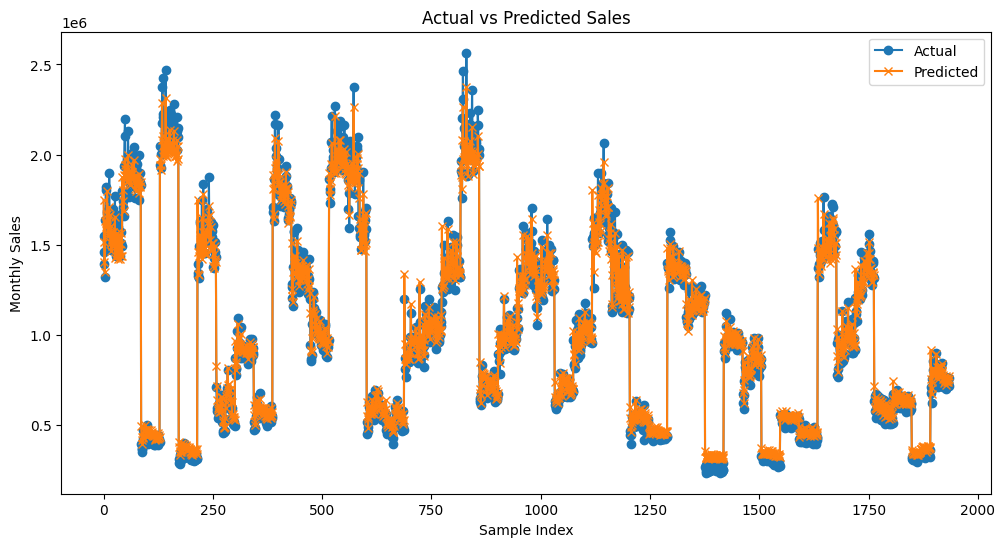

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Monthly Sales')
plt.legend()
plt.show()

In [ ]:

error_percent=np.abs(y_test-y_pred)/y_test
mean_error=np.mean(error_percent)*100

print(f"Mean_error %:{mean_error:.2f}%")
print (f"Accuracy %:{100-mean_error:.2f}%")


Mean_error %:4.75%
Accuracy %:95.25%


<Figure size 1000x1600 with 0 Axes>

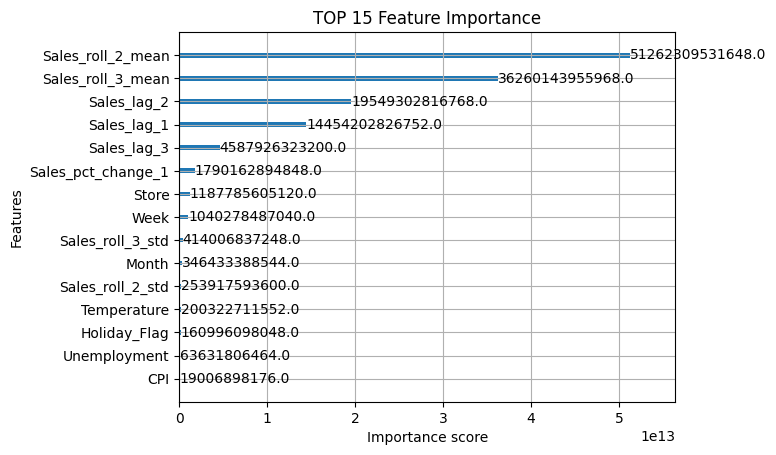

In [38]:
from xgboost import plot_importance
plt.figure(figsize=(10,16))
plot_importance(best_model,max_num_features=15,importance_type='gain')
plt.title("TOP 15 Feature Importance")
plt.show()

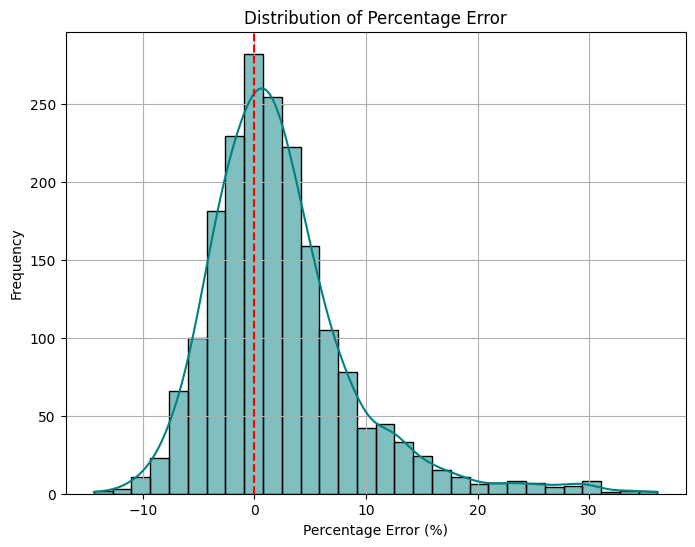

In [40]:
percentage_error = ((y_pred-y_test) / y_test) * 100

plt.figure(figsize=(8, 6))
sns.histplot(percentage_error, bins=30, kde=True, color='teal')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Percentage Error")
plt.xlabel("Percentage Error (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [44]:
X_test

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_roll_2_mean,Sales_roll_2_std,Sales_roll_3_mean,Sales_roll_3_std,Sales_pct_change_1,Store
0,0,49.01,3.157,219.714258,7.348,2012,1,1,1,1497462.72,2270188.99,1881176.67,1883825.855,546399.985518,1.882943e+06,386366.162443,0.035331,1
1,0,48.53,3.261,219.892526,7.348,2012,1,2,1,1550369.92,1497462.72,2270188.99,1523916.320,37411.039894,1.772674e+06,431672.050229,-0.058547,1
2,0,54.11,3.268,219.985689,7.348,2012,1,3,1,1459601.17,1550369.92,1497462.72,1504985.545,64183.198645,1.502478e+06,45591.729434,-0.044675,1
3,0,54.26,3.290,220.078852,7.348,2012,1,4,1,1394393.84,1459601.17,1550369.92,1426997.505,46108.545226,1.468122e+06,78336.346816,-0.053836,1
4,0,56.55,3.360,220.172015,7.348,2012,2,5,1,1319325.59,1394393.84,1459601.17,1356859.715,53081.268627,1.391107e+06,70195.532132,0.240285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,0,64.88,3.997,192.013558,8.684,2012,9,39,3,723086.20,702238.27,766512.66,712662.235,14741.712677,7.306124e+05,32791.489809,-0.013708,45
1931,0,64.89,3.985,192.170412,8.667,2012,10,40,4,713173.95,723086.20,702238.27,718130.075,7009.019192,7.128328e+05,10428.150863,0.028438,45
1932,0,54.47,4.000,192.327265,8.667,2012,10,41,4,733455.07,713173.95,723086.20,723314.510,14340.917482,7.232384e+05,10141.416680,0.001376,45
1933,0,56.47,3.969,192.330854,8.667,2012,10,42,4,734464.36,733455.07,713173.95,733959.715,713.675803,7.270311e+05,12011.272850,-0.022246,45


In [47]:
import pandas as pd

# Make a copy of X_test to avoid modifying original
output_df = X_test.copy()

# Add actual and predicted sales
output_df['Actual_Weekly_Sales'] = y_test.values
output_df['Predicted_Weekly_Sales'] = y_pred

# Columns to drop
drop_cols = [
    'Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3',
    'Sales_roll_2_mean', 'Sales_roll_2_std',
    'Sales_roll_3_mean', 'Sales_roll_3_std',
    'Sales_pct_change_1'
]

# Drop them if they exist in X_test
output_df = output_df.drop(columns=[col for col in drop_cols if col in output_df.columns])

# Optional: Round values for readability
output_df['Actual_Weekly_Sales'] = output_df['Actual_Weekly_Sales'].round(2)
output_df['Predicted_Weekly_Sales'] = output_df['Predicted_Weekly_Sales'].round(2)

# Save to CSV
output_df.to_csv('predicted_sales_clean.csv', index=False)

print("✅ Cleaned prediction CSV saved as 'predicted_sales_clean.csv'")


✅ Cleaned prediction CSV saved as 'predicted_sales_clean.csv'


In [48]:
import pandas as pd
from datetime import datetime

# Start from a copy
output_df = X_test.copy()

# Add actual and predicted values
output_df['Actual_Weekly_Sales'] = y_test.values
output_df['Predicted_Weekly_Sales'] = y_pred

# 🔹 Step 1: Create a "Date" column from Year + Week
# Assuming Week is ISO week (1–53)
def get_date_from_ymw(row):
    return datetime.strptime(f"{int(row['Year'])}-{int(row['Week'])}-1", "%G-%V-%u")

output_df['Date'] = output_df.apply(get_date_from_ymw, axis=1)

# 🔹 Step 2: Drop lag, rolling, percentage, and calendar parts
cols_to_drop = [
    'Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3',
    'Sales_roll_2_mean', 'Sales_roll_2_std',
    'Sales_roll_3_mean', 'Sales_roll_3_std',
    'Sales_pct_change_1',
    'Year', 'Month', 'Week', 'Quarter'
]

output_df = output_df.drop(columns=[col for col in cols_to_drop if col in output_df.columns])

# Optional: Round values
output_df['Actual_Weekly_Sales'] = output_df['Actual_Weekly_Sales'].round(2)
output_df['Predicted_Weekly_Sales'] = output_df['Predicted_Weekly_Sales'].round(2)

# Save
output_df.to_csv('predicted_sales_clean.csv', index=False)

print("✅ Final CSV saved as 'predicted_sales_clean.csv' with clean columns and combined Date.")


✅ Final CSV saved as 'predicted_sales_clean.csv' with clean columns and combined Date.


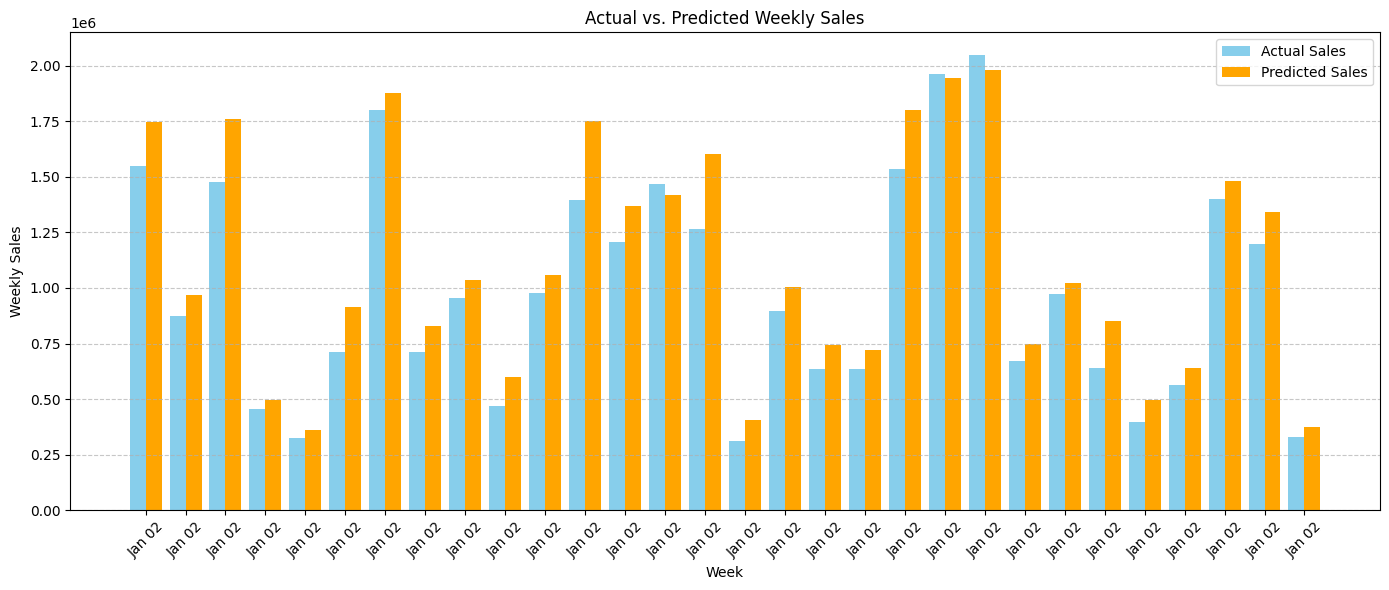

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your saved CSV
df = pd.read_csv(r"Data/predicted_sales_clean.csv")

# Optional: sort by Date to make the graph cleaner
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Plot for first N rows to keep graph readable
N = 30  # You can increase this if needed
sample_df = df.head(N)

# Plotting
plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(N)

plt.bar(x, sample_df['Actual_Weekly_Sales'], width=bar_width, label='Actual Sales', color='skyblue')
plt.bar([i + bar_width for i in x], sample_df['Predicted_Weekly_Sales'], width=bar_width, label='Predicted Sales', color='orange')

# Set x-ticks and labels
plt.xticks([i + bar_width / 2 for i in x], sample_df['Date'].dt.strftime('%b %d'), rotation=45)

# Labels and title
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
